<a href="https://colab.research.google.com/github/saranshikens/Basic-ML/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jayaantanaath_student_habits_vs_academic_performance_path = kagglehub.dataset_download('jayaantanaath/student-habits-vs-academic-performance')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")
data = pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")

The dataset provides data about various student habits and their academic performance.  
In this notebook, I will be trying to get some key insights from the data, and draw some conclusions.

To get an idea of how the dataset actually looks, we output the first 5 rows from it.

In [4]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


We try to gain some quick statistical properties of each non-categorical feature.

In [5]:
data.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


We import some standard libraries for plotting graphs.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

**EXPLORING THE EFFECTS OF STUDY HOURS ON DIFFERENT FEATURES**

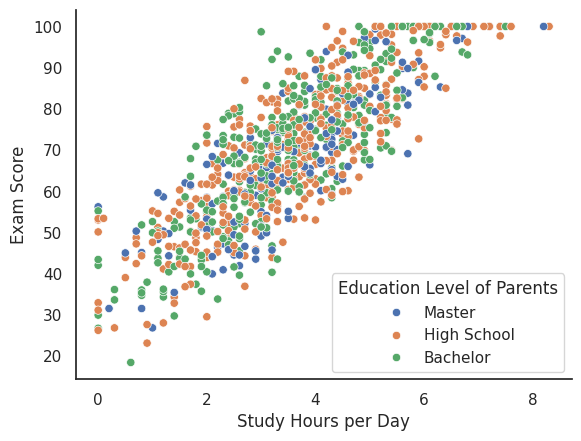

In [7]:
sns.scatterplot(x=data['study_hours_per_day'], y=data['exam_score'], hue=data['parental_education_level'])
sns.despine()
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.legend(title='Education Level of Parents')

As expected, the plot shows a positive correlation between the hours studied by a student on a daily basis and the exam scores.   
On average, a student who is studying more is able to score more than those who studied less.

Text(0, 0.5, 'Internet Quality')

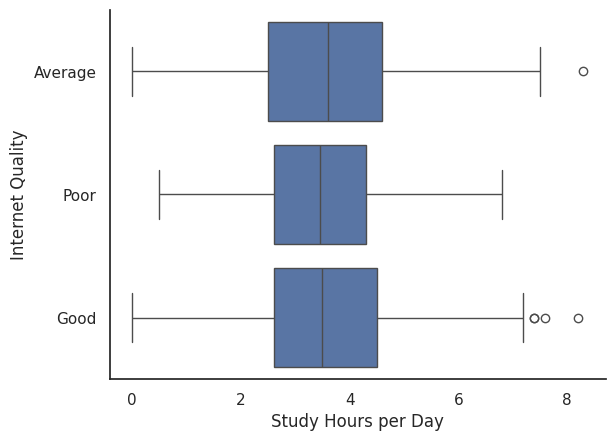

In [8]:
sns.boxplot(x=data['study_hours_per_day'], y=data['internet_quality'])
sns.despine()
plt.xlabel('Study Hours per Day')
plt.ylabel('Internet Quality')

The median hours studied per day for all the 3 categores is almost the same.   
In addition to this, the least amount of hours studied by the students having 'poor' internet quality is the largest among the 3 categories.   
This may be due to not having access to 'distraactions' such as social media.
Much difference cannot be observed between the distribution of 'Average' and 'Good' categories.   
This means the quality of services used by students using internet is not likely affected by the quality of internet.   
Such services include social media.

Text(0.5, 0, 'Extracurricular Participation')

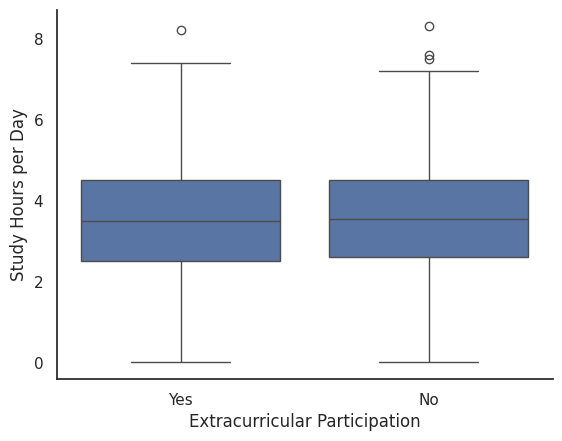

In [9]:
sns.boxplot(y=data['study_hours_per_day'], x=data['extracurricular_participation'])
sns.despine()
plt.ylabel('Study Hours per Day')
plt.xlabel("Extracurricular Participation")

Participating in extracurricular activities does not have an effect on study hours.  
Students participating are able to study as much as those who do not, as seen by the similarity  
of these two distributions.  

**STUDYING THE EFFECTS OF SOCIAL MEDIA AND NETFLIX**

'social_media_hours' and 'netflix_hours' can be considered as a single feature since both involve using a device and internet connection.  
Both have been combined into a new feature - 'entertainment_hours'.

In [10]:
entertainment_hours = data['social_media_hours']+data['netflix_hours']

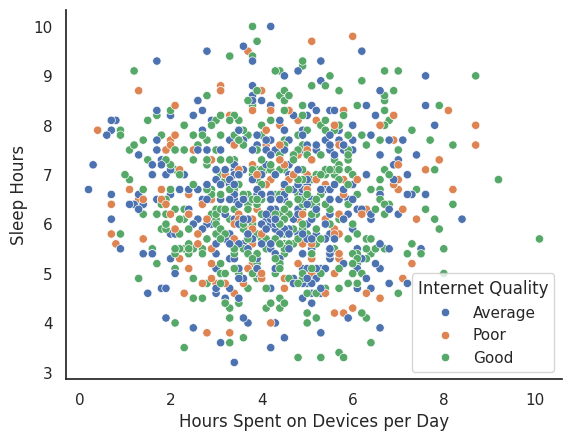

In [11]:
sns.scatterplot(x=entertainment_hours, y=data['sleep_hours'], hue=data['internet_quality'])
sns.despine()
plt.xlabel('Hours Spent on Devices per Day')
plt.ylabel('Sleep Hours')
plt.legend(title="Internet Quality")

The above plot gives is rather surprising. The data is uniformily distributed for all the 3 categories of Internet Quality.  
Some students spend less time on devices and sleep less as well, while some are on the other end of the spectrum.

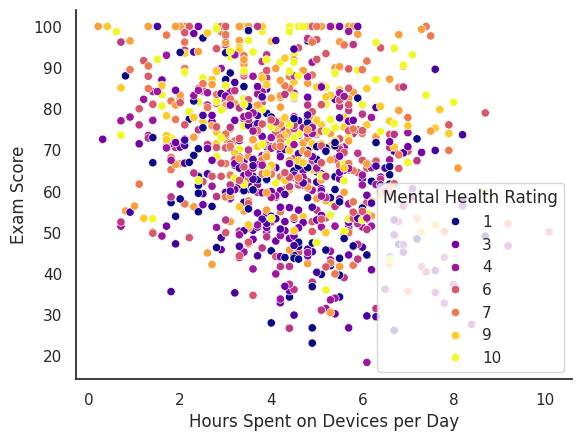

In [12]:
sns.scatterplot(x=entertainment_hours, y=data['exam_score'], hue=data['mental_health_rating'], palette='plasma')
sns.despine()
plt.xlabel('Hours Spent on Devices per Day')
plt.ylabel('Exam Score')
plt.legend(title="Mental Health Rating")

A majority of the students having a mental health rating <= 6 scored <= 60% in the exam.  
Hours spent on devices does not seem to affect the mental health of students since   
the data points with rating <= 6 can be found abundantly in almost all the x-axis categories.  

**STUDYING THE EFFECTS OF ATTENDANCE**

In [13]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


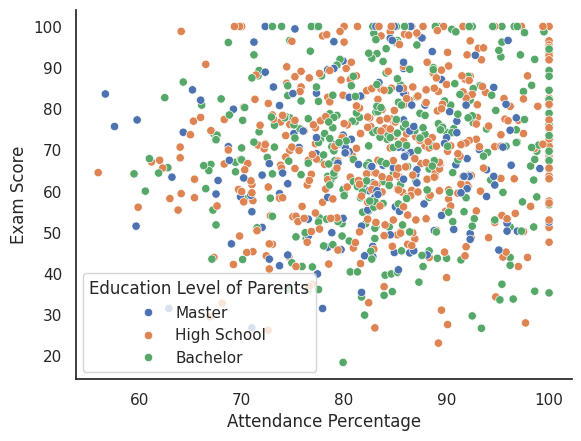

In [14]:
sns.scatterplot(x=data['attendance_percentage'], y=data['exam_score'], hue=data['parental_education_level'])
sns.despine()
plt.xlabel('Attendance Percentage')
plt.ylabel('Exam Score')
plt.legend(title="Education Level of Parents")

The plot shockingly, suggests that attending classes does not have an effect on the exam score.  
From the first plot, we know that studying hours is positively correlated with exam score.   
This could mean that many students prefer studying on their own.

**STUDYING THE EFFECTS OF MENTAL HEALTH**

Text(0, 0.5, 'Sleep Hours')

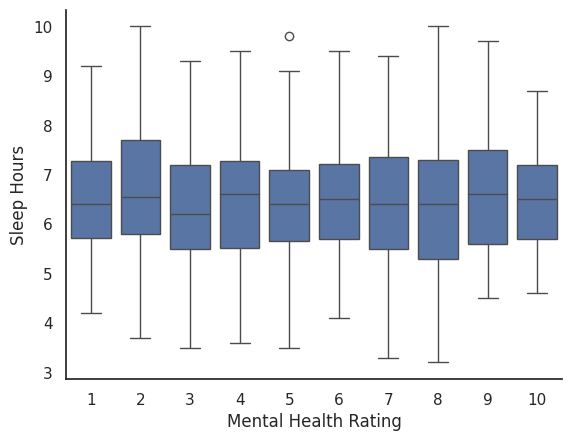

In [15]:
sns.boxplot(x=data['mental_health_rating'], y=data['sleep_hours'])
sns.despine()
plt.xlabel('Mental Health Rating')
plt.ylabel('Sleep Hours')

Mental health rating does not have an effect on sleep hours.
Majority of the students, regardless of their rating, sleep between 5 and 7 hours daily.

**FACTORS AFFECTING MENTAL HEALTH**

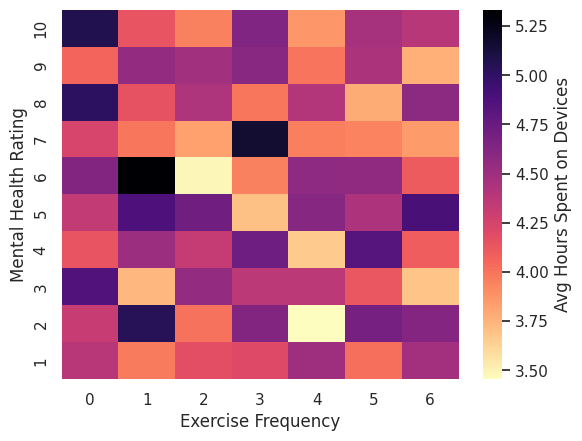

In [16]:
data['entertainment_hours'] = data['social_media_hours']+data['netflix_hours']
heatmap_data = data.pivot_table(
    index='mental_health_rating',
    columns='exercise_frequency',
    values='entertainment_hours',
    aggfunc='mean'
)
sns.heatmap(heatmap_data, annot=False, fmt=".1f", cmap="magma_r", cbar_kws={'label':'Avg Hours Spent on Devices'})
plt.xlabel('Exercise Frequency')
plt.ylabel('Mental Health Rating')
plt.gca().invert_yaxis()

We observe darker colors in the bottom left quadrant of the heatmap.  
This suggests that one of the reasons of low mental health ratings could be  
lack of exercise.

Text(0, 0.5, 'Mental Health Rating')

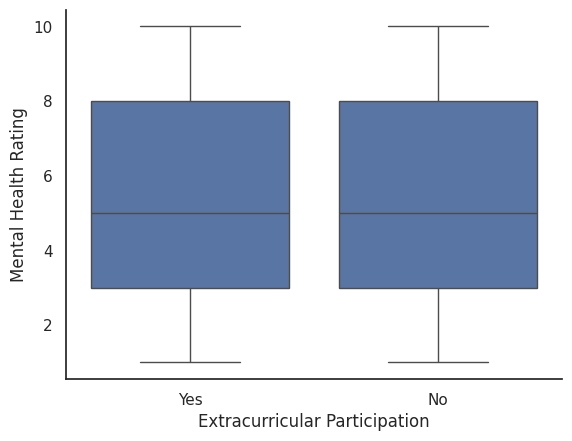

In [17]:
sns.boxplot(x=data['extracurricular_participation'], y=data['mental_health_rating'])
sns.despine()
plt.xlabel('Extracurricular Participation')
plt.ylabel('Mental Health Rating')

Participating in extracurricular activities is not benefitting the students.   
If it was, we would see the lower bound for 'Yes' above that of 'No'.

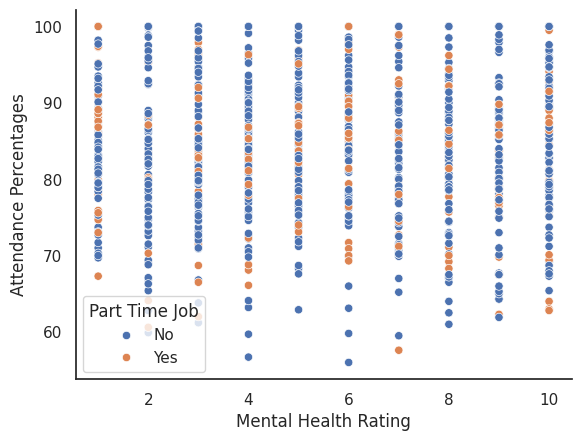

In [18]:
sns.scatterplot(x=data['mental_health_rating'], y=data['attendance_percentage'], hue=data['part_time_job'])
sns.despine()
plt.xlabel('Mental Health Rating')
plt.ylabel('Attendance Percentages')
plt.legend(title="Part Time Job", loc='lower left')

**CONCLUSIONS**

* Study time is the strongest predictor of exam performance.

* Mental health is closely tied to exam performance, though not to screen time or sleep hours.

* Exercise appears beneficial for mental health, whereas internet quality and class attendance show limited influence.

* Students may benefit more from structured self-study and regular physical activity than from relying solely on external systems like class attendance or internet access.